In [1]:
from QUANTAXIS.QAARP.QAStrategy import QA_Strategy
from QUANTAXIS.QAARP.QAAccount import  QA_Account
from QUANTAXIS.QAUtil.QAParameter import (AMOUNT_MODEL, MARKET_TYPE,
                                          FREQUENCE, ORDER_DIRECTION,
                                          ORDER_MODEL,RUNNING_ENVIRONMENT)


import random


QUANTAXIS>> start QUANTAXIS
QUANTAXIS>> Welcome to QUANTAXIS, the Version is 1.0.47
QUANTAXIS>>  
 ```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````` 
  ``########`````##````````##``````````##`````````####````````##```##########````````#``````##``````###```##`````######`` 
  `##``````## ```##````````##`````````####````````##`##```````##```````##```````````###``````##````##`````##```##`````##` 
  ##````````##```##````````##````````##`##````````##``##``````##```````##``````````####```````#```##``````##```##``````## 
  ##````````##```##````````##```````##```##```````##```##`````##```````##`````````##`##```````##`##```````##````##``````` 
  ##````````##```##````````##``````##`````##``````##````##````##```````##````````##``###```````###````````##`````##`````` 
  ##````````##```##````````##``````##``````##`````##`````##```##```````##```````##````##```````###````````##``````###```` 
  ##````````##```##````````##`````##`````

In [2]:
class MAMINT0Strategy(QA_Account):
    def __init__(self,init_hold={'000001':10000,'000002':20000,'000004':40000}):
        super().__init__(init_hold=init_hold)
        self.running_environment=RUNNING_ENVIRONMENT.TZERO
        self.frequence = FREQUENCE.FIFTEEN_MIN
        self.market_type = MARKET_TYPE.STOCK_CN

    def on_bar(self, event):
        try:
            for item in event.market_data.code:

                print(self.current_time)
                print(self.datetime)
                print('=====SELL_AVAILABLE======')
                print(self.sell_available)
                print('=====HOLD_AVAILABLE======')
                print(self.hold_available)
                print('=====BUY_AVAILABLE=======')
                print(self.buy_available)
                if self.sell_available.get(item, 0) > 0:
                    event.send_order(account_id=self.account_cookie,
                                        amount=int(self.sell_available[item]*random.random()/100)*100, amount_model=AMOUNT_MODEL.BY_AMOUNT,
                                        time=self.current_time, code=item, price=0,
                                        order_model=ORDER_MODEL.MARKET, towards=ORDER_DIRECTION.SELL,
                                        market_type=self.market_type, frequence=self.frequence,
                                        broker_name=self.broker
                                        )
                if random.random()>0.5:
                    event.send_order(account_id=self.account_cookie,
                                        amount=random.randint(1,50)*100, amount_model=AMOUNT_MODEL.BY_AMOUNT,
                                        time=self.current_time, code=item, price=0,
                                        order_model=ORDER_MODEL.MARKET, towards=ORDER_DIRECTION.BUY,
                                        market_type=self.market_type, frequence=self.frequence,
                                        broker_name=self.broker)
        except:
            pass

In [3]:

from QUANTAXIS.QAARP.QARisk import QA_Risk
from QUANTAXIS.QAARP.QAUser import QA_User
from QUANTAXIS.QABacktest.QABacktest import QA_Backtest
from QUANTAXIS.QAUtil.QALogs import QA_util_log_info
from QUANTAXIS.QAUtil.QAParameter import FREQUENCE, MARKET_TYPE


class Backtest(QA_Backtest):
    '''
    多线程模式回测示例

    '''

    def __init__(self, market_type, frequence, start, end, code_list, commission_fee):
        super().__init__(market_type,  frequence, start, end, code_list, commission_fee)
        self.user = QA_User()
        t0strategy=MAMINT0Strategy()
        # maminstrategy.reset_assets(1000)
        # self.portfolio, self.account = self.user.register_account(mastrategy)
        self.user = QA_User(user_cookie='user_admin')
        self.portfolio = self.user.new_portfolio('folio_admin')
        self.portfolio, self.account = self.user.register_account(t0strategy)

    def after_success(self):
        QA_util_log_info(self.account.history_table)
        risk = QA_Risk(self.account, benchmark_code='000300',
                       benchmark_type=MARKET_TYPE.INDEX_CN)

        print(risk().T)

        self.account.save()
        risk.save()

In [4]:
import QUANTAXIS as QA
backtest = Backtest(market_type=MARKET_TYPE.STOCK_CN,
                    frequence=FREQUENCE.FIFTEEN_MIN,
                    start='2017-11-01',
                    end='2017-11-05',
                    code_list=['000001','000002','000004'],
                    commission_fee=0.00015)
backtest.start_market()

backtest.run()
backtest.stop()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: QUANTAXIS 1.0.46 has changed the init_assets ==> init_cash, please pay attention to this change if you using init_cash to initial an account class,                
  This is separate from the ipykernel package so we can avoid doing imports until


===== SETTLED None =====
2017-11-01 09:45:00
None
=====SELL_AVAILABLE======
code
000001    10000
000002    20000
000004    40000
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
Series([], Name: amount, dtype: float64)
=====BUY_AVAILABLE=======
code
000001    10000
000002    20000
000004    40000
Name: amount, dtype: int64
2017-11-01 09:45:00
2017-11-01 09:45:00
=====SELL_AVAILABLE======
code
000001     3300
000002    20000
000004    40000
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
Series([], Name: amount, dtype: float64)
=====BUY_AVAILABLE=======
code
000001    10000
000002    20000
000004    40000
Name: amount, dtype: int64
2017-11-01 09:45:00
2017-11-01 09:45:00
=====SELL_AVAILABLE======
code
000001     3300
000002     4900
000004    40000
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
Series([], Name: amount, dtype: float64)
=====BUY_AVAILABLE=======
code
000001    10000
000002    18500
000004    40000
Name: amount, dtype: int64
< QA_Order datetime:2017-11-01 09

2017-11-01 11:00:00< QA_Order datetime:2017-11-01 10:45:00 code:000002 amount:200 price:29.72 towards:-1 btype:stock_cn order_id:Order_QbPrJuC0 account:Acc_NVlUvOCs status:300 >

2017-11-01 10:45:00< QA_Order datetime:2017-11-01 10:45:00 code:000002 amount:3500 price:29.72 towards:1 btype:stock_cn order_id:Order_SCsz9mOb account:Acc_NVlUvOCs status:300 >

=====SELL_AVAILABLE======< QA_Order datetime:2017-11-01 10:45:00 code:000004 amount:300 price:23.64 towards:-1 btype:stock_cn order_id:Order_b1WheJO6 account:Acc_NVlUvOCs status:300 >

code
000001    200
000002    100
000004    200
Name: amount, dtype: int64
< QA_Order datetime:2017-11-01 10:45:00 code:000004 amount:4600 price:23.64 towards:1 btype:stock_cn order_id:Order_VO8RHqGC account:Acc_NVlUvOCs status:300 >=====HOLD_AVAILABLE======

code
000001     -500.0
000002   -10200.0
000004   -31700.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001      700
000002    10300
000004    27300
Name: amount, dtype: int64
T0交易

Name: amount, dtype: int64
ERROR : amount=0
2017-11-01 14:00:00
2017-11-01 13:15:00
=====SELL_AVAILABLE======
code
000001    100
000002    100
000004    100
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
code
000001      100.0
000002    -5800.0
000004   -23900.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001        0
000002     5900
000004    24000
Name: amount, dtype: int64
ERROR : amount=0
2017-11-01 14:00:00
2017-11-01 13:15:00
=====SELL_AVAILABLE======
code
000001    100
000002    100
000004    100
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
code
000001      100.0
000002    -5800.0
000004   -23900.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001        0
000002     5900
000004    24000
Name: amount, dtype: int64
ERROR : amount=0
2017-11-01 14:00:00
2017-11-01 13:15:00
=====SELL_AVAILABLE======
code
000001    100
000002    100
000004    100
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
code
000001      100.0
000002    -58

< QA_Order datetime:2017-11-02 09:45:00 code:000002 amount:14000 price:28.81 towards:-1 btype:stock_cn order_id:Order_f4AgX9Nh account:Acc_NVlUvOCs status:300 >2017-11-02 09:45:00

=====SELL_AVAILABLE======
code
000001      700.0
000002     6000.0
000004    21700.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======< QA_Order datetime:2017-11-02 09:45:00 code:000002 amount:200 price:28.81 towards:1 btype:stock_cn order_id:Order_gkFtYwPU account:Acc_NVlUvOCs status:300 >

code
000001    -9300.0
000002   -14000.0
000004        0.0
Name: amount, dtype: float64< QA_Order datetime:2017-11-02 09:45:00 code:000004 amount:18300 price:23.52 towards:-1 btype:stock_cn order_id:Order_FVtamfRY account:Acc_NVlUvOCs status:300 >

=====BUY_AVAILABLE=======
code
000001    10000.0
000002    19800.0
000004    40000.0
Name: amount, dtype: float64
2017-11-02 10:00:00
2017-11-02 10:00:00
=====SELL_AVAILABLE======
code
000001      500.0
000002     6000.0
000004    21700.0
Name: amount, dtype: float64
====

Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     6300.0
000002    12800.0
000004    31900.0
Name: amount, dtype: float64
ERROR : amount=0
2017-11-02 11:00:00
2017-11-02 10:45:00
=====SELL_AVAILABLE======
code
000001    100.0
000002    300.0
000004    200.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -6200.0
000002   -12500.0
000004   -31700.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     6300.0
000002    12800.0
000004    31900.0
Name: amount, dtype: float64
< QA_Order datetime:2017-11-02 11:00:00 code:000004 amount:100 price:23.57 towards:-1 btype:stock_cn order_id:Order_0KegPZqz account:Acc_NVlUvOCs status:300 >
2017-11-02 11:15:00
< QA_Order datetime:2017-11-02 11:00:00 code:000004 amount:900 price:23.57 towards:1 btype:stock_cn order_id:Order_JVyNwGWl account:Acc_NVlUvOCs status:300 >2017-11-02 11:00:00

=====SELL_AVAILABLE======
code
000001    100.0
000002    300.0
000004    100.0
Name: amount, dtype: float64

2017-11-02 13:45:00
=====SELL_AVAILABLE======
code
000001    100.0
000002    100.0
000004    100.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -2000.0
000002    -3000.0
000004   -26200.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     2100.0
000002     3100.0
000004    26300.0
Name: amount, dtype: float64
ERROR : amount=0
T0交易买入超出限额
ERROR : amount=0
2017-11-02 14:00:00
2017-11-02 13:45:00
=====SELL_AVAILABLE======
code
000001    100.0
000002    100.0
000004    100.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -2000.0
000002    -3000.0
000004   -26200.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     2100.0
000002     3100.0
000004    26300.0
Name: amount, dtype: float64
ERROR : amount=0
T0交易买入超出限额
ERROR : amount=0
2017-11-02 14:00:00
2017-11-02 13:45:00
=====SELL_AVAILABLE======
code
000001    100.0
000002    100.0
000004    100.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code

Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    0.0
000002    0.0
000004    0.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001    10000.0
000002    20000.0
000004    40000.0
Name: amount, dtype: float64
< QA_Order datetime:2017-11-03 09:45:00 code:000001 amount:8700 price:11.44 towards:-1 btype:stock_cn order_id:Order_tQud7Jzo account:Acc_NVlUvOCs status:300 >
< QA_Order datetime:2017-11-03 09:45:00 code:000002 amount:13900 price:29.42 towards:-1 btype:stock_cn order_id:Order_TICbD0Ri account:Acc_NVlUvOCs status:300 >
2017-11-03 10:00:00
2017-11-03 09:45:00
< QA_Order datetime:2017-11-03 09:45:00 code:000004 amount:300 price:23.62 towards:-1 btype:stock_cn order_id:Order_aWyUKYqV account:Acc_NVlUvOCs status:300 >
=====SELL_AVAILABLE======
< QA_Order datetime:2017-11-03 09:45:00 code:000004 amount:4500 price:23.62 towards:1 btype:stock_cn order_id:Order_WY7naqTw account:Acc_NVlUvOCs status:300 >code
000001     1300.0
000002     6100.0
000004    

=====SELL_AVAILABLE======< QA_Order datetime:2017-11-03 10:45:00 code:000004 amount:200 price:23.48 towards:-1 btype:stock_cn order_id:Order_OULp1Khu account:Acc_NVlUvOCs status:300 >

code
000001    200.0
000002    200.0
000004    500.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -8400.0
000002   -14000.0
000004   -28200.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     8600.0
000002    14200.0
000004    28700.0
Name: amount, dtype: float64
2017-11-03 11:00:00
2017-11-03 11:00:00
=====SELL_AVAILABLE======
code
000001    100.0
000002    200.0
000004    500.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -8400.0
000002   -14000.0
000004   -28200.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     8600.0
000002    14200.0
000004    28700.0
Name: amount, dtype: float64
2017-11-03 11:00:00
2017-11-03 11:00:00
=====SELL_AVAILABLE======
code
000001    100.0
000002    100.0
000004    500.0
Name: amou

=====BUY_AVAILABLE=======
code
000001     7500.0
000002     8100.0
000004    17000.0
Name: amount, dtype: float64
ERROR : amount=0
2017-11-03 13:45:00
2017-11-03 13:30:00
=====SELL_AVAILABLE======
code
000001    100.0
000002    100.0
000004    100.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -7400.0
000002    -8000.0
000004   -16900.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     7500.0
000002     8100.0
000004    17000.0
Name: amount, dtype: float64
ERROR : amount=0
< QA_Order datetime:2017-11-03 13:45:00 code:000004 amount:3100 price:23.32 towards:1 btype:stock_cn order_id:Order_q67opDQG account:Acc_NVlUvOCs status:300 >
2017-11-03 14:00:00
2017-11-03 13:45:00
=====SELL_AVAILABLE======
code
000001    100.0
000002    100.0
000004    100.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -7400.0
000002    -8000.0
000004   -13800.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     7500.0
000002

QUANTAXIS>>                 datetime    code  price   amount        order_id  \
0    2017-11-01 09:45:00  000001  11.53  -6700.0  Order_qAImvRTs   
1    2017-11-01 09:45:00  000002  29.34 -15100.0  Order_qbgt3pQT   
2    2017-11-01 09:45:00  000002  29.34   1500.0  Order_ajTxrtcm   
3    2017-11-01 09:45:00  000004  23.47  -1300.0  Order_s0T4oS7b   
4    2017-11-01 09:45:00  000004  23.47   3100.0  Order_m4jlQJLi   
5    2017-11-01 10:00:00  000001  11.48  -2000.0  Order_XUJ38Tic   
6    2017-11-01 10:00:00  000001  11.48   4500.0  Order_sCAZWd2Y   
7    2017-11-01 10:00:00  000002  30.03  -4000.0  Order_rAI17oXj   
8    2017-11-01 10:00:00  000002  30.03   4700.0  Order_ich6RPJf   
9    2017-11-01 10:00:00  000004  23.61 -37300.0  Order_5pZNF1Lu   
10   2017-11-01 10:15:00  000001  11.54   -500.0  Order_nmEbL2FT   
11   2017-11-01 10:15:00  000002  30.28   -200.0  Order_t4p2ifyh   
12   2017-11-01 10:15:00  000004  23.75   -600.0  Order_h3WFNypX   
13   2017-11-01 10:15:00  000004  23

                               0
account_cookie      Acc_NVlUvOCs
alpha                       1.22
annualize_return            1.14
benchmark_code            000300
beta                           1
bm_annualizereturn         -0.08
bn_profit                     -0
init_cash             1000000.00
last_assets           1005933.85
max_dropback                0.01
portfolio_cookie     folio_admin
profit                      0.01
sharpe                      3.76
time_gap                       3
user_cookie           user_admin
volatility                  0.29


In [5]:
backtest.account.history_table

,datetime,code,price,amount,order_id,trade_id,account_cookie,commission,tax
0,2017-11-01 09:45:00,000001,11.53,-6700.0,Order_qAImvRTs,Trade_jqEwMkSp,Acc_NVlUvOCs,19.304375,115.82625
1,2017-11-01 09:45:00,000002,29.34,-15100.0,Order_qbgt3pQT,Trade_tTSi8qjN,Acc_NVlUvOCs,110.739625,664.43775
2,2017-11-01 09:45:00,000002,29.34,1500.0,Order_ajTxrtcm,Trade_UrLQYMWe,Acc_NVlUvOCs,11.000625,0.00000
3,2017-11-01 09:45:00,000004,23.47,-1300.0,Order_s0T4oS7b,Trade_Smr36Ch1,Acc_NVlUvOCs,7.627750,45.76650
4,2017-11-01 09:45:00,000004,23.47,3100.0,Order_m4jlQJLi,Trade_WdzVmk93,Acc_NVlUvOCs,18.189250,0.00000
5,2017-11-01 10:00:00,000001,11.48,-2000.0,Order_XUJ38Tic,Trade_vVrsFmzy,Acc_NVlUvOCs,5.740000,34.44000
6,2017-11-01 10:00:00,000001,11.48,4500.0,Order_sCAZWd2Y,Trade_ySf6FVtJ,Acc_NVlUvOCs,12.915000,0.00000
7,2017-11-01 10:00:00,000002,30.03,-4000.0,Order_rAI17oXj,Trade_AfIQlDw4,Acc_NVlUvOCs,30.030000,180.18000
8,2017-11-01 10:00:00,000002,30.03,4700.0,Order_ich6RPJf,Trade_s2Fnt6VE,Acc_NVlUvOCs,35.285250,0.00000
9,2017-11-01 10:00:00,000004,23.61,-37300.0,Order_5pZNF1Lu,Trade_W7Yd0V3I,Acc_NVlUvOCs,220.116625,1320.69975


In [6]:
risk=QA.QA_Risk(backtest.account)

In [7]:
risk.profit_construct

{'total_buyandsell': 15795.0,
 'total_tax': -7363.13,
 'total_commission': -2498.02,
 'total_profit': 5933.85}

In [8]:
backtest.account.init_assets

{'cash': 1000000, 'hold': {'000001': 10000, '000002': 20000, '000004': 40000}}

In [11]:
backtest.account.daily_hold

,code,000001,000002,000004
date,account_cookie,,,
2017-11-01,Acc_NVlUvOCs,0.0,0.0,0.0
2017-11-02,Acc_NVlUvOCs,0.0,0.0,0.0
2017-11-03,Acc_NVlUvOCs,-3500.0,-6300.0,-7200.0


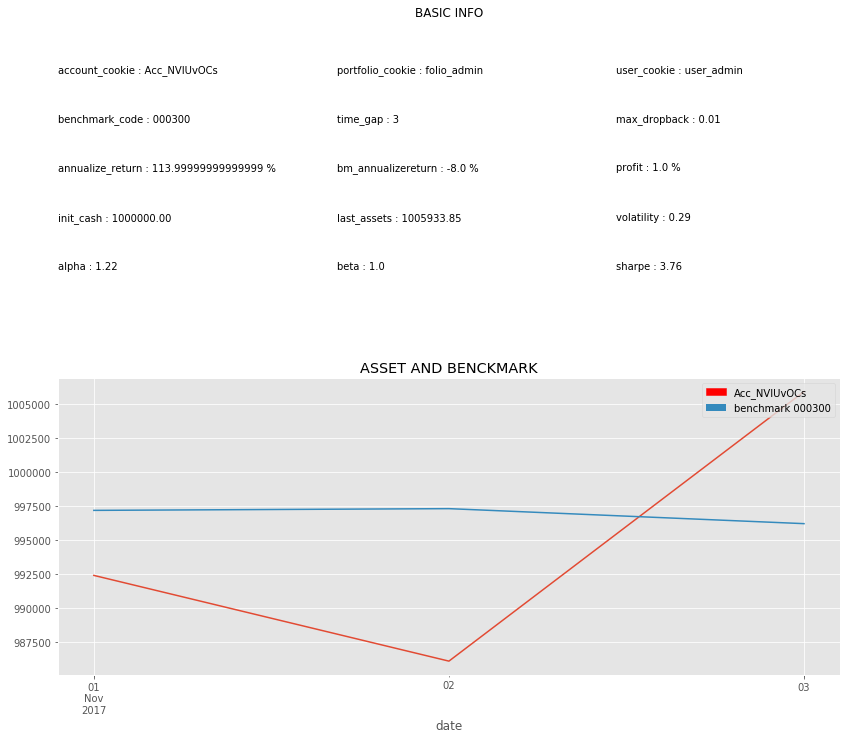

In [10]:
risk.plot_assets_curve()